# 1. import libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import tree
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
warnings.filterwarnings("ignore")
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = 15,5
%matplotlib inline

---
# 2. import dataset

In [4]:
df = pd.read_csv('../inputs/training_set.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 59 columns):
Unnamed: 0    3910 non-null int64
X1            3910 non-null float64
X2            3910 non-null float64
X3            3910 non-null float64
X4            3910 non-null float64
X5            3910 non-null float64
X6            3910 non-null float64
X7            3910 non-null float64
X8            3910 non-null float64
X9            3910 non-null float64
X10           3910 non-null float64
X11           3910 non-null float64
X12           3910 non-null float64
X13           3910 non-null float64
X14           3910 non-null float64
X15           3910 non-null float64
X16           3910 non-null float64
X17           3910 non-null float64
X18           3910 non-null float64
X19           3910 non-null float64
X20           3910 non-null float64
X21           3910 non-null float64
X22           3910 non-null float64
X23           3910 non-null float64
X24           3910 non-null flo

---
# 3. IV

In [5]:
def shortlist_var(x,y,z,i,j):
    df[x] = df[x].fillna(-1)
    dtree = tree.DecisionTreeClassifier(random_state=42, max_depth=i, min_samples_leaf=j)
    dtree = dtree.fit(df[[x]],df[y])
    
    df[z] = dtree.apply(df[[x]])
    gb = df.groupby(z).agg({'Unnamed: 0':'count', x:['min','max'], y:'mean'}).reset_index()
    gb.columns = ['bin', 'count', 'min', 'max', 'bad']
    
    gb['good'] = 1 - gb['bad']
    gb['pct_bad'] = gb['bad'] / gb['bad'].sum()
    gb['pct_good'] = gb['good'] / gb['good'].sum()
    gb['WOE'] = np.log(gb['pct_bad'] / gb['pct_good'])
    gb['IV'] = gb['WOE'] * (gb['pct_bad'] - gb['pct_good'])
    print(x,': ',round(gb['IV'].sum(),3))

In [6]:
shortlist_var('X1', 'Y', 'bin', 3, 200)
shortlist_var('X2', 'Y', 'bin', 3, 200)
shortlist_var('X3', 'Y', 'bin', 3, 200)
shortlist_var('X4', 'Y', 'bin', 3, 200)
shortlist_var('X5', 'Y', 'bin', 3, 200)
shortlist_var('X6', 'Y', 'bin', 3, 200)
shortlist_var('X7', 'Y', 'bin', 3, 200)
shortlist_var('X8', 'Y', 'bin', 3, 200)
shortlist_var('X9', 'Y', 'bin', 3, 200)
shortlist_var('X10', 'Y', 'bin', 3, 200)
shortlist_var('X11', 'Y', 'bin', 3, 200)
shortlist_var('X12', 'Y', 'bin', 3, 200)
shortlist_var('X13', 'Y', 'bin', 3, 200)
shortlist_var('X14', 'Y', 'bin', 3, 200)
shortlist_var('X15', 'Y', 'bin', 3, 200)
shortlist_var('X16', 'Y', 'bin', 3, 200)
shortlist_var('X17', 'Y', 'bin', 3, 200)
shortlist_var('X18', 'Y', 'bin', 3, 200)
shortlist_var('X19', 'Y', 'bin', 3, 200)
shortlist_var('X20', 'Y', 'bin', 3, 200)
shortlist_var('X21', 'Y', 'bin', 3, 200)
shortlist_var('X22', 'Y', 'bin', 3, 200)
shortlist_var('X23', 'Y', 'bin', 3, 200)
shortlist_var('X24', 'Y', 'bin', 3, 200)
shortlist_var('X25', 'Y', 'bin', 3, 200)
shortlist_var('X26', 'Y', 'bin', 3, 200)
shortlist_var('X27', 'Y', 'bin', 3, 200)
shortlist_var('X28', 'Y', 'bin', 3, 200)
shortlist_var('X29', 'Y', 'bin', 3, 200)
shortlist_var('X30', 'Y', 'bin', 3, 200)
shortlist_var('X31', 'Y', 'bin', 3, 200)
shortlist_var('X32', 'Y', 'bin', 3, 200)
shortlist_var('X33', 'Y', 'bin', 3, 200)
shortlist_var('X34', 'Y', 'bin', 3, 200)
shortlist_var('X35', 'Y', 'bin', 3, 200)
shortlist_var('X36', 'Y', 'bin', 3, 200)
shortlist_var('X37', 'Y', 'bin', 3, 200)
shortlist_var('X38', 'Y', 'bin', 3, 200)
shortlist_var('X39', 'Y', 'bin', 3, 200)
shortlist_var('X40', 'Y', 'bin', 3, 200)
shortlist_var('X41', 'Y', 'bin', 3, 200)
shortlist_var('X42', 'Y', 'bin', 3, 200)
shortlist_var('X43', 'Y', 'bin', 3, 200)
shortlist_var('X44', 'Y', 'bin', 3, 200)
shortlist_var('X45', 'Y', 'bin', 3, 200)
shortlist_var('X46', 'Y', 'bin', 3, 200)
shortlist_var('X47', 'Y', 'bin', 3, 200)
shortlist_var('X48', 'Y', 'bin', 3, 200)
shortlist_var('X49', 'Y', 'bin', 3, 200)
shortlist_var('X50', 'Y', 'bin', 3, 200)
shortlist_var('X51', 'Y', 'bin', 3, 200)
shortlist_var('X52', 'Y', 'bin', 3, 200)
shortlist_var('X53', 'Y', 'bin', 3, 200)
shortlist_var('X54', 'Y', 'bin', 3, 200)
shortlist_var('X55', 'Y', 'bin', 3, 200)
shortlist_var('X56', 'Y', 'bin', 3, 200)
shortlist_var('X57', 'Y', 'bin', 3, 200)

X1 :  0.416
X2 :  0.691
X3 :  0.434
X4 :  0.0
X5 :  0.565
X6 :  0.648
X7 :  2.901
X8 :  0.829
X9 :  0.674
X10 :  0.434
X11 :  1.101
X12 :  0.406
X13 :  0.39
X14 :  0.388
X15 :  1.382
X16 :  1.283
X17 :  0.77
X18 :  0.422
X19 :  0.46
X20 :  1.898
X21 :  0.775
X22 :  0.0
X23 :  2.188
X24 :  2.653
X25 :  3.09
X26 :  2.812
X27 :  inf
X28 :  1.21
X29 :  3.357
X30 :  1.578
X31 :  2.451
X32 :  0.0
X33 :  0.506
X34 :  0.0
X35 :  1.651
X36 :  0.452
X37 :  0.781
X38 :  0.0
X39 :  0.772
X40 :  0.02
X41 :  0.0
X42 :  2.667
X43 :  1.516
X44 :  0.941
X45 :  1.213
X46 :  1.348
X47 :  0.0
X48 :  0.0
X49 :  0.223
X50 :  0.646
X51 :  0.234
X52 :  1.064
X53 :  1.815
X54 :  0.539
X55 :  1.487
X56 :  1.505
X57 :  1.251


In [7]:
shortlist_var('X23', 'Y', 'bin', 3, 200)
shortlist_var('X31', 'Y', 'bin', 3, 200)
shortlist_var('X24', 'Y', 'bin', 3, 200)
shortlist_var('X42', 'Y', 'bin', 3, 200)
shortlist_var('X26', 'Y', 'bin', 3, 200)
shortlist_var('X7', 'Y', 'bin', 3, 200)
shortlist_var('X25', 'Y', 'bin', 3, 200)
shortlist_var('X29', 'Y', 'bin', 3, 200)
shortlist_var('X27', 'Y', 'bin', 3, 200)

X23 :  2.188
X31 :  2.451
X24 :  2.653
X42 :  2.667
X26 :  2.812
X7 :  2.901
X25 :  3.09
X29 :  3.357
X27 :  inf


---
# 4. VIF

In [8]:
def VIF (data):
    X = add_constant(data)
    Y = pd.Series([variance_inflation_factor(X.values, i)
                   for i in range(X.shape[1])],
                  index=X.columns)
    print(Y)

In [9]:
x = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 
        'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29',
        'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 
        'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57']]
VIF(x)

const      5.760919
X1         1.114705
X2         1.032913
X3         1.110700
X4         1.005584
X5         1.131212
X6         1.113979
X7         1.122714
X8         1.104488
X9         1.232571
X10        1.086940
X11        1.205791
X12        1.110524
X13        1.096370
X14        1.077925
X15        1.356871
X16        1.069370
X17        1.199993
X18        1.158980
X19        1.320131
X20        1.134471
X21        1.327096
X22        1.300010
X23        1.322395
X24        1.087865
X25        1.563415
X26        1.515763
X27        1.115245
X28        1.939884
X29        1.840897
X30        2.184289
X31        2.379171
X32      110.333161
X33        1.058818
X34      107.189785
X35        1.719972
X36        2.655705
X37        1.281053
X38        1.046945
X39        1.145760
X40        3.534098
X41        1.171563
X42        1.461171
X43        1.232854
X44        1.035731
X45        1.093573
X46        1.210346
X47        1.014413
X48        1.014559
X49        1.248900


In [10]:
x = df[['X27','X29','X25','X7','X26','X42','X24','X31','X23']]
VIF(x)

const    1.498539
X27      1.013588
X29      1.532706
X25      1.394101
X7       1.019822
X26      1.401184
X42      1.314182
X24      1.011384
X31      1.351799
X23      1.022156
dtype: float64


---
# 5. dependent variable

0    2376
1    1534
Name: Y, dtype: int64


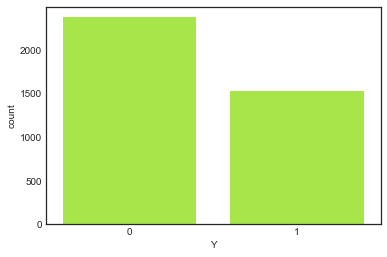

In [11]:
print(df['Y'].value_counts())
sns.countplot(df['Y'], color='greenyellow');